In [485]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import random

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


print(tf.__version__)

2.9.2


In [486]:
def binaries_concat(top, bottom, shoes):
  
  i1 = str(hex(top)).split("x")[1] + str(hex(bottom)).split("x")[1] + str(hex(shoes)).split("x")[1]
  i2 = str(hex(bottom)).split("x")[1] + str(hex(shoes)).split("x")[1] + str(hex(top)).split("x")[1]
  i3 = str(hex(shoes)).split("x")[1] + str(hex(top)).split("x")[1] + str(hex(bottom)).split("x")[1]
  return(int("0x"+i1, 16), int("0x"+i2, 16), int("0x"+i3, 16))

binaries_concat(1,3,11)

(315, 945, 2835)

In [487]:
url = '/content/out.csv'
raw_dataset = pd.read_csv(url, header = 0,
                          na_values='?', comment='\t',
                          sep=',', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset

,top,bottom,shoes,result
0,2.0,2.0,3.0,0.0
1,4.0,4.0,1.0,0.0
2,4.0,3.0,4.0,0.0
3,1.0,4.0,3.0,1.0
4,1.0,2.0,2.0,0.0
...,...,...,...,...
195,1.0,3.0,4.0,1.0
196,4.0,3.0,1.0,1.0
197,4.0,4.0,2.0,1.0
198,2.0,2.0,1.0,0.0


In [488]:
def toInt(s):
  return int(s.split("_")[1])

def toString(categorie, i):
  if(i<10):
    return (categorie + "_00" + str(i))
  elif(i<100):
    return (categorie + "_0" + str(i))
  
  return (categorie + "_" + str(i))

In [489]:
def result_analyse(result):
  a = result[0][0]
  if(a < 0):
    return 0
  elif(a > 1):
    return 1
  else:
    return round(a)

In [490]:
categorie = "top"
print(dataset[categorie][5])
print(toString(categorie, dataset[categorie][5]))

3.0
top_003.0


In [491]:
data_tab = []
for index, row in dataset.iterrows():
    top, bottom, shoes = binaries_concat(round(row["top"]), round(row["bottom"]), round(row["shoes"]))
    data_tab.append([top, bottom, shoes, row["result"]])
  

dataset_ = pd.DataFrame(data_tab)
dataset_.columns = ["top", "bottom", "shoes", "result"]
print(dataset_)

      top  bottom  shoes  result
0     547     562    802     0.0
1    1089    1044    324     0.0
2    1076     836   1091     0.0
3     323    1073    788     1.0
4     290     545    530     0.0
..    ...     ...    ...     ...
195   308     833   1043     1.0
196  1073     788    323     1.0
197  1090    1060    580     1.0
198   545     530    290     0.0
199  1044     324   1089     0.0

[200 rows x 4 columns]


In [492]:
train_copy = dataset_.copy()
train_labels = train_copy.pop('result')

train_features = train_copy[["top", "bottom", "shoes"]]
train_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
top,200.0,688.130,293.656524,273.0,324.0,786.0,1041.0,1092.0
bottom,200.0,711.155,291.927094,273.0,530.0,787.0,1043.0,1092.0
shoes,200.0,690.530,302.933230,273.0,324.0,785.0,1043.0,1092.0


In [493]:
features_normalizer = layers.Normalization(axis=-1)
features_normalizer.adapt(train_features)

#print(features_normalizer[0])
print(features_normalizer.mean.numpy())

[[688.13  711.155 690.53 ]]


In [494]:
def build_model(norm):
  model = keras.Sequential([
      norm,
      layers.GaussianNoise(0.1, seed=None),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [495]:
model = build_model(features_normalizer)
model.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_41 (Normaliza  (None, 3)                7         
 tion)                                                           
                                                                 
 gaussian_noise_23 (Gaussian  (None, 3)                0         
 Noise)                                                          
                                                                 
 dense_249 (Dense)           (None, 64)                256       
                                                                 
 dense_250 (Dense)           (None, 64)                4160      
                                                                 
 dense_251 (Dense)           (None, 64)                4160      
                                                                 
 dense_252 (Dense)           (None, 1)               

In [496]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [497]:
%%time
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 1s 45ms/step - loss: 0.5021 - val_loss: 0.5258
Epoch 2/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.4884 - val_loss: 0.5449
Epoch 3/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.4695 - val_loss: 0.5505
Epoch 4/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.4661 - val_loss: 0.5614
Epoch 5/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.4541 - val_loss: 0.5607
Epoch 6/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.4470 - val_loss: 0.5533
Epoch 7/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.4434 - val_loss: 0.5552
Epoch 8/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.4385 - val_loss: 0.5545
Epoch 9/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.4308 - val_loss: 0.5548
Epoch 10/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.4261 - val_loss: 0.5596
Epoch 11/1000
5/

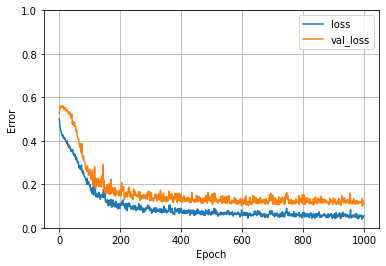

In [498]:
plot_loss(history)

In [499]:
s = 0
for j in range(200):
    top = random.randint(1, 4)  
    bottom = random.randint(1, 4)
    shoes = random.randint(1, 4)

    top_, bottom_, shoes_ = binaries_concat(top, bottom, shoes)

    result = 0

    if ((top + bottom + shoes) % 2 == 0):
        result = 1

    if (result == result_analyse(model.predict([top_,bottom_,shoes_]))):
      s+=1
    


print(s/200)

1/1 [==============================] - 0s 40ms/step
0.975


In [500]:
model.save('/content/model.h5')